In [29]:
import numpy as np

In [30]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)
train_data,train_label=load_data("train.data")
test_data,test_label=load_data("test.data")
print(train_data,train_label)
print(test_data,test_label)

[[0.     0.64   0.64   ... 0.3756 0.61   0.278 ]
 [0.06   0.     0.71   ... 0.9821 4.85   2.259 ]
 [0.     0.     0.     ... 0.3537 0.4    0.191 ]
 ...
 [0.3    0.     0.3    ... 0.1404 0.06   0.118 ]
 [0.96   0.     0.     ... 0.1147 0.05   0.078 ]
 [0.     0.     0.65   ... 0.125  0.05   0.04  ]] ['1' '1' '1' ... '0' '0' '0']
[[0.21   0.28   0.5    ... 0.5114 1.01   1.028 ]
 [0.     0.     0.     ... 0.3537 0.4    0.191 ]
 [0.     0.69   0.34   ... 0.3728 0.61   0.261 ]
 ...
 [0.     0.     0.     ... 0.1    0.01   0.006 ]
 [0.     0.     0.     ... 0.1727 0.05   0.019 ]
 [0.     0.     1.19   ... 0.1    0.01   0.024 ]] ['1' '1' '1' ... '0' '0' '0']


In [31]:
len(test_data)


1377

In [32]:
train_data[10]

array([0.    , 0.42  , 0.42  , 0.    , 1.27  , 0.    , 0.42  , 0.    ,
       0.    , 1.27  , 0.    , 0.    , 0.    , 0.    , 0.    , 1.27  ,
       0.    , 0.    , 1.7   , 0.42  , 1.27  , 0.    , 0.    , 0.42  ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 1.27  , 0.    , 0.    , 0.42  ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.063 , 0.    , 0.572 , 0.063 , 0.    , 0.5659, 0.55  ,
       0.249 ])

In [34]:
import tensorflow as tf
from tensorflow import keras 

In [35]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
layers.Dense(57, activation='softmax'),
layers.Dense(1, activation='relu')])

In [36]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
history=model.fit(train_data,
                    train_label,
                    epochs=60,
                    batch_size=100,
                    validation_data=(test_data, test_label),
                    verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/60
3224/3224 [==============================] - 0s 44us/step - loss: 0.2348 - acc: 0.9132 - val_loss: 0.2338 - val_acc: 0.9201
Epoch 2/60
3224/3224 [==============================] - 0s 31us/step - loss: 0.2330 - acc: 0.9138 - val_loss: 0.2324 - val_acc: 0.9216
Epoch 3/60
3224/3224 [==============================] - 0s 31us/step - loss: 0.2316 - acc: 0.9138 - val_loss: 0.2312 - val_acc: 0.9216
Epoch 4/60
3224/3224 [==============================] - 0s 36us/step - loss: 0.2301 - acc: 0.9156 - val_loss: 0.2303 - val_acc: 0.9230
Epoch 5/60
3224/3224 [==============================] - 0s 35us/step - loss: 0.2284 - acc: 0.9156 - val_loss: 0.2241 - val_acc: 0.9252
Epoch 6/60
3224/3224 [==============================] - 0s 32us/step - loss: 0.2269 - acc: 0.9169 - val_loss: 0.2279 - val_acc: 0.9259
Epoch 7/60
3224/3224 [==============================] - 0s 31us/step - loss: 0.2254 - acc: 0.9184 - val_loss: 0.2211 - val_acc: 0.9259
Epoch 8

In [38]:
import matplotlib.pyplot as plt


In [39]:
history_dict=history.history
history_dict.keys()
dict_keys=['loss', 'val_loss', 'val_acc', 'acc']

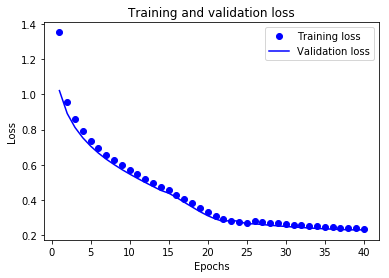

In [40]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

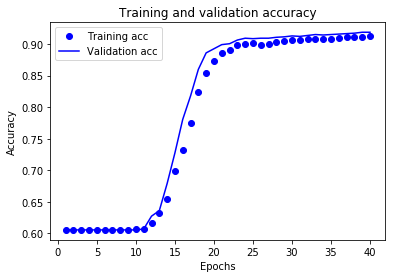

In [41]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
def load_prediction_data(file_path):
    data=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            sample=np.array([float(feature) for feature in sample])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data)
prediction_data=load_prediction_data("get_the_flag.data")

In [43]:
predictions = model.predict(prediction_data)

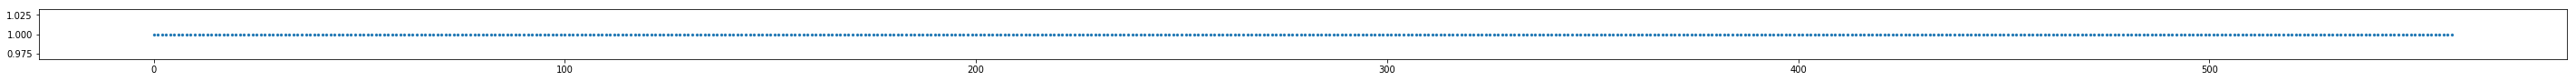

In [78]:
data_show=[]
for i in predictions:
    if i[0]<0.5:
        data_show.append(0)
    else:
        data_show.append(1)
plt.rcParams['figure.figsize'] = (50.0, 1.0) 
plt.scatter(range(len(data_show)),data_show,linewidth=0.1,s=10)
plt.show()